### 1. 통계분석

#### Carseats 데이터는 자동차 좌석에 대한 판매정보이며, 변수의 설명은 아래와 같다. (생략)

1) Urban 변수에 따른 Sales의 차이가 있는지를 통계적으로 검증하기 위한 통계 분석을 수행하고, 결과를 해석하시오. (데이터는 정규성을 만족한다고 가정하고 유의수준 0.05 하에서 검정)

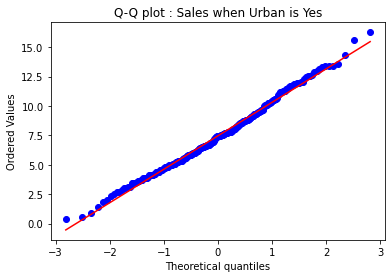

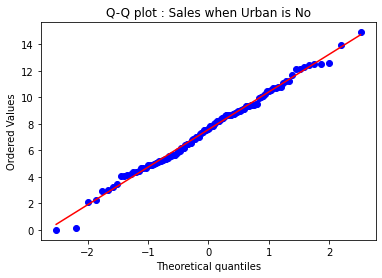

Shapiro-Wilk Test when Urban is Yes : ShapiroResult(statistic=0.9926273822784424, pvalue=0.17656336724758148) 
Shapiro-Wilk Test when Urban is No : ShapiroResult(statistic=0.9937147498130798, pvalue=0.8764287829399109) 
F_onewayResult(statistic=0.09465065557659712, pvalue=0.7585069603942085)
t-test 결과 : Ttest_indResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775)
대립가설 기각 : Urban 여부에 따른 판매량 평균의 차이는 없습니다.


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("data/모의고사 3회/Carseats.csv")
# 결측치 없음
# for col in df.columns:
#     print("col : {}".format(col))
#     display(df[df[col].isnull()])

#Urban 여부에 따라 두 개 집단으로 나눈다.
urban_yes_group = df.loc[(df.Urban == "Yes"), ["Sales"]]
urban_no_group = df.loc[(df.Urban == "No"), ["Sales"]]

# display(urban_yes_group, urban_no_group)

#가정1 : 독립성이 있는 표본집단인가?
#가정2 : 두 집단이 모두 정규성을 만족하는가?
#가정3 : 등분산성을 만족하는가?

#독립성은 있다고 보고, 정규성이 있는지 확인하기 위해 QQ플롯을 그려보고...
stats.probplot(urban_yes_group["Sales"], plot=plt)
plt.title("Q-Q plot : Sales when Urban is Yes")
plt.show()

stats.probplot(urban_no_group["Sales"], plot=plt)
plt.title("Q-Q plot : Sales when Urban is No")
plt.show()

#Shapiro-Wilk 정규성 검정으로 확실하게 알아본다. (귀무가설 : 정규성이 있다.)
print("Shapiro-Wilk Test when Urban is Yes : {} ".format(stats.shapiro(urban_yes_group["Sales"])))
print("Shapiro-Wilk Test when Urban is No : {} ".format(stats.shapiro(urban_no_group["Sales"])))

#두 개 집단이 등분산성을 만족하는가?
print(stats.f_oneway(urban_yes_group["Sales"], urban_no_group["Sales"]))

#모든 가정이 적합하므로 독립표본 t-test를 실시한다. 귀무가설 : Urban 여부에 따른 판매량에는 평균의 차이가 없다.
ttest = stats.ttest_ind(urban_yes_group["Sales"], urban_no_group["Sales"])
print("t-test 결과 : {}".format(ttest))
if ttest.pvalue <= 0.05:
    print("귀무가설 기각 : Urban 여부에 따라 판매량 평균의 차이가 있습니다.")
else:
    print("대립가설 기각 : Urban 여부에 따른 판매량 평균의 차이는 없습니다.")

2) Sales 변수와 CompPrice, Income, Advertising, Population, Price, Age, Education 변수들 간에 피어슨 상관계수를 이용한 상관관계 분석을 수행하고 이를 해석하시오.

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


,Var1,Var2,상관계수,p-value
0,Sales,CompPrice,0.064079,2.009398e-01
1,Sales,Income,0.151951,2.309670e-03
2,Sales,Advertising,0.269507,4.377677e-08
3,Sales,Population,0.050471,3.139816e-01
4,Sales,Price,-0.444951,7.618187e-21
5,Sales,Age,-0.231815,2.788950e-06
6,Sales,Education,-0.051955,2.999442e-01


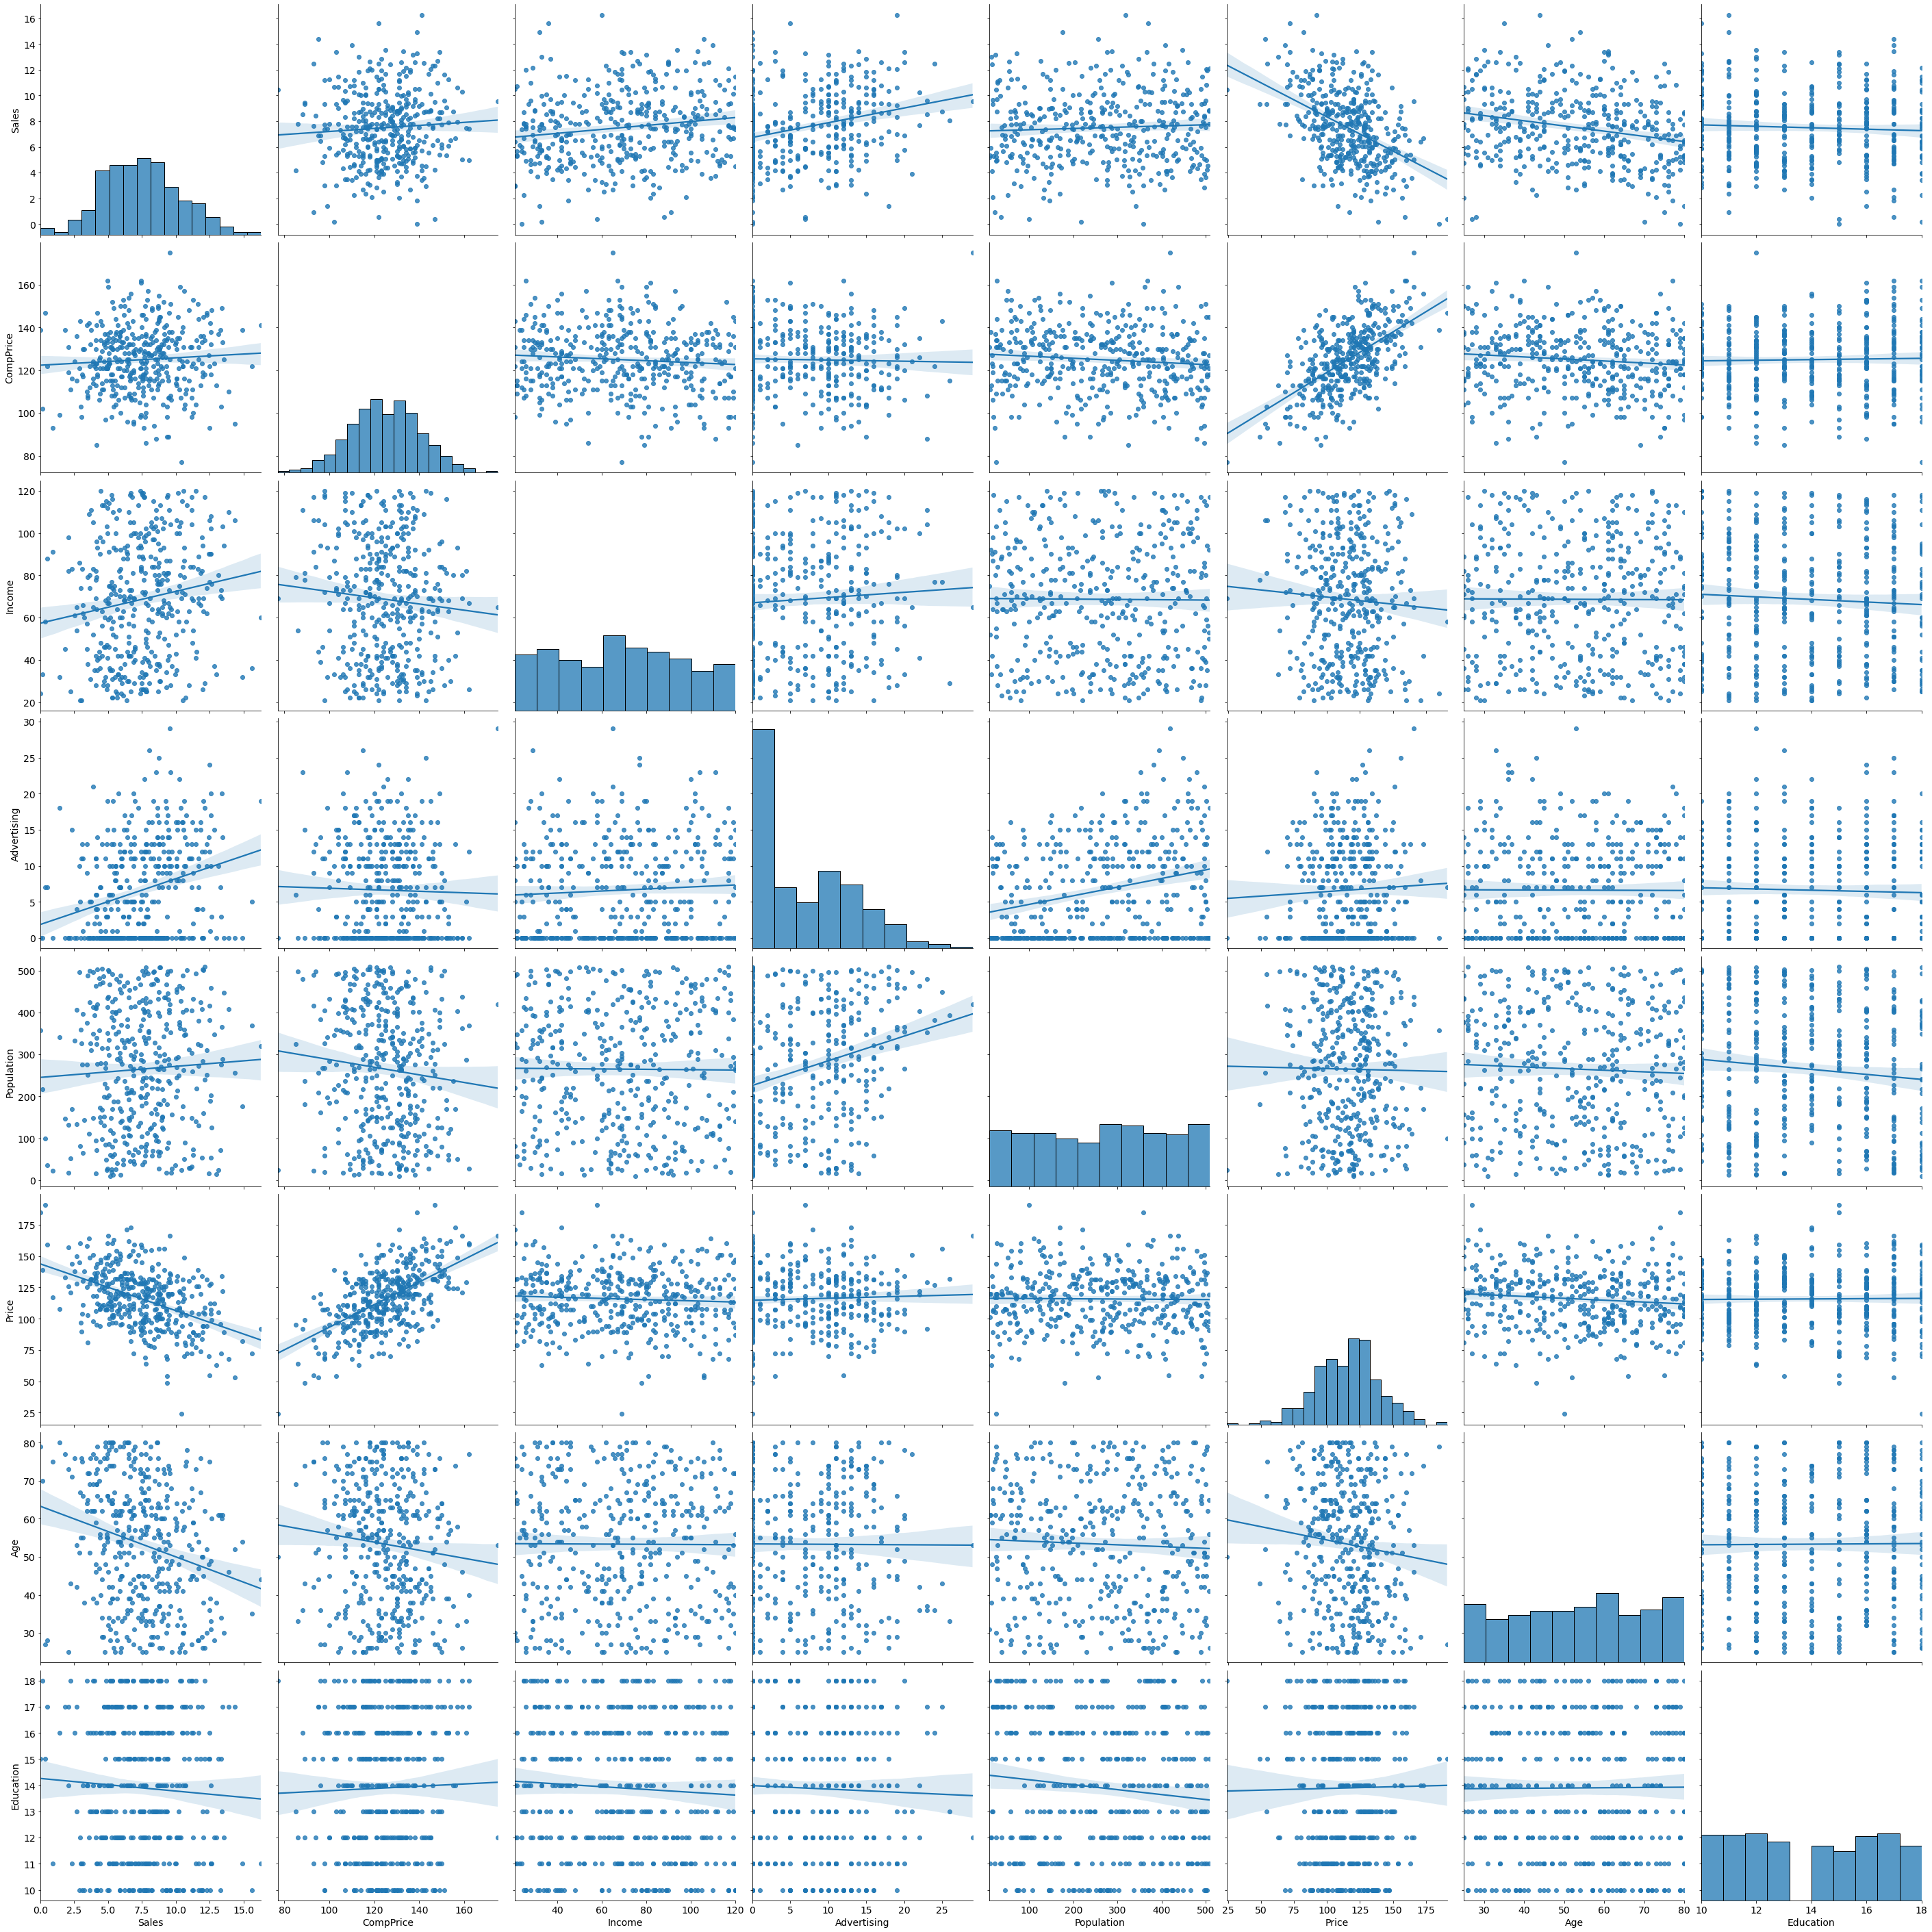

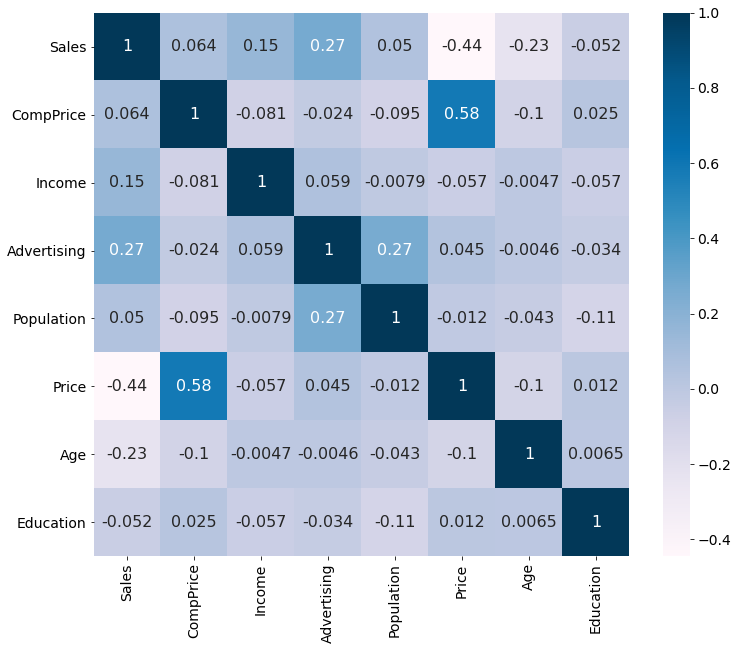

In [94]:
var_list = ["Sales", "CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education"]
display(df[var_list].corr())

corr_list = []
for var in var_list:
    this_list = {}
    if var != "Sales":
        r = stats.pearsonr(df["Sales"], df[var])
        this_list["Var1"] = "Sales"
        this_list["Var2"] = var
        this_list["상관계수"] = r[0]
        this_list["p-value"] = r[1]
        corr_list.append(this_list)
df_corr = pd.DataFrame(corr_list)
display(df_corr)

sns.pairplot(df[var_list], kind="reg", height=5)
plt.show()

plt.figure(figsize=(12, 10))
plt.rcParams["font.size"] = 14
colormap = plt.cm.PuBu
sns.heatmap(df[var_list].corr(), cmap=colormap, annot = True, annot_kws = {"size" : 16})
plt.show()

# sns.regplot(x=df["Price"], y=df["Sales"])
# plt.show()


3) 종속변수를 Sales, 독립변수를 CompPrice, Income, Advertising, Population, Price, Age, Education으로 설정하고 후진제거법을 활용하여 회귀분석을 실시하고, 추정된 회귀식을 작성하시오.

In [100]:
import statsmodels.formula.api as smf

#일단 모든 변수를 선택하여 다 해본다.
indi_var_list = ["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education"]
indi_var_formula = "+".join(indi_var_list)
model = smf.ols("Sales ~ "+indi_var_formula, df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     66.18
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           1.41e-62
Time:                        16:27:27   Log-Likelihood:                -826.32
No. Observations:                 400   AIC:                             1669.
Df Residuals:                     392   BIC:                             1701.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.7077      1.118      6.896      0.000       5.510       9.905
CompPrice       0.0939      0.008     11.980      0.000       0.079       0.109
Income          0.0129      0.003      3.703      0.000       0.006       0.020
Advertising     0.1309      0.015      8.654      0.000       0.101       0.161
Population     -0.0001      0.001     -0.180      0.857      -0.001       0.001
Price          -0.0925      0.005    -18.314      0.000      -0.102      -0.083
Age            -0.0450      0.006     -7.485      0.000      -0.057      -0.033
Education      -0.0400      0.037     -1.077      0.282      -0.113       0.033
==============================================================================
Omnibus:                        8.263   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.705
Skew:                           0.288   Prob(JB):                       0.0212
Kurtosis:                       2.639   Cond. No.                     4.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
#후진제거법
def backward_elimination(df, dep_var, ind_vars, select_criteria = "AIC", return_case = "s"):
    alpha = 0.05
    selected_vars = ind_vars.copy()
    eliminated_vars = []
    done = False
    
    while done is False:
        #step1 : 변수 하나씩을 제외한 n개의 모델을 만들어낸다. (n : 변수 갯수)
        model_result_list = []
        for var in selected_vars:
            var_list = ind_vars.copy()
            if len(eliminated_vars)>0:
                for el_var in eliminated_vars:
                    var_list.remove(el_var)
            var_list.remove(var)
            this_ind_vars_str = " + ".join(var_list)
            this_model_fit = smf.ols(dep_var+" ~ "+this_ind_vars_str, data=df).fit()
            this_result = {
                "selected var" : this_ind_vars_str,
                "eliminated var" : var,            
                "AIC" : this_model_fit.aic,
                "rsquared_adj" : this_model_fit.rsquared_adj
            }
            model_result_list.append(this_result)
        result = pd.DataFrame(model_result_list)
        #step2 : n개 모델들 중 가장 좋은 결과를 보인 모델을 선택하고, 제외 후보 변수를 찾는다.
        ascending = True
        if select_criteria == "rsquared_adj":
            ascending = False
        result.sort_values(by=select_criteria, ascending=ascending, inplace=True)
        candidate_var = result.iloc[0, [1]].values[0]
        #step3 : 제외 후보 변수로 fitting하여 p-value를 알아보고 유의하다면 종료한다.
        candidate_model_fit = smf.ols(dep_var+" ~ "+candidate_var, data=df).fit()
        if candidate_model_fit.pvalues[candidate_var] > alpha: #유의하지 않다면
            eliminated_vars.append(candidate_var) #제거확정
            selected_vars.remove(candidate_var)
            print("{} 변수를 제거합니다.".format(candidate_var))
        else: #유의하다면 종료한다
            done = True
    if return_case == "s":
        print("후보 독립변수들 : {}".format(ind_vars))
        print("후진제거법에 의해 선택된 최종 변수들 : {}".format(selected_vars))
        return selected_vars
    elif return_case == "e":
        return eliminated_vars

indi_var_list = ["CompPrice", "Income", "Advertising", "Population", "Price", "Age", "Education"]
selected_vars = backward_elimination(df, "Sales", indi_var_list, "AIC")

#후진 제거법에 의해 선택된 변수만으로 회귀분석을 해본다.
indi_var_formula = "+".join(selected_vars)
model = smf.ols("Sales ~ "+indi_var_formula, df)
model.fit().summary()

Population 변수를 제거합니다.
Education 변수를 제거합니다.
후보 독립변수들 : ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
후진제거법에 의해 선택된 최종 변수들 : ['CompPrice', 'Income', 'Advertising', 'Price', 'Age']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     92.62
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           2.70e-64
Time:                        16:43:21   Log-Likelihood:                -826.92
No. Observations:                 400   AIC:                             1666.
Df Residuals:                     394   BIC:                             1690.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.1092      0.944      7.531      0.000       5.253       8.965
CompPrice       0.0939      0.008     12.051      0.000       0.079       0.109
Income          0.0131      0.003      3.779      0.000       0.006       0.020
Advertising     0.1306      0.015      8.963      0.000       0.102       0.159
Price          -0.0925      0.005    -18.347      0.000      -0.102      -0.083
Age            -0.0450      0.006     -7.503      0.000      -0.057      -0.033
==============================================================================
Omnibus:                        9.073   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.154
Skew:                           0.288   Prob(JB):                       0.0170
Kurtosis:                       2.602   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ShapiroResult(statistic=0.9853091835975647, pvalue=0.00044231684296391904)


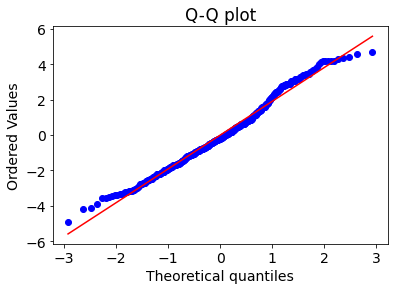

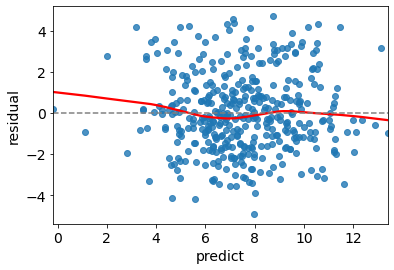

In [125]:
#잔차 분석을 수행해 본다.
predict = model.fit().predict(df)
predict.name="predict"

residual = df["Sales"] - predict
residual.name="residual"

print(stats.shapiro(residual))

# 2. Q-Q plot으로 시각화하여 정규성 체크
#    X축은 정규분포곡선의 확률분포 위치값
#    Y축은 잔차가 정규분포곡선의 분포와 비교해 얼마나 떨어져 있는지의 값
#    붉은선에서 벗어나 있으면(대각선이 아니면) 정규성 없다고 봄

stats.probplot(residual, plot=plt)
plt.title("Q-Q plot")
plt.show()

#잔차의 등분산성 검증
#붉은색 선이 직선에 가까우면 등분산으로 볼 수 있음
sns.regplot(x=predict, y=residual, lowess=True, line_kws={'color': 'red'})
plt.plot([predict.min(), predict.max()], [0, 0], '--', color='grey')

4) 앞서 생성한 회귀모델에 대해 해석하시오.